<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/RL_Gym_FrozenLake_v1_Qlearning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frozen Lake 강화학습 연습

<img src="https://github.com/aidentify/lecture/blob/master/study2/2_RL/img/frozenlake_env.png?raw=1" width="700">

## 필요한 모듈 import
* gym (가상환경을 제공)
* numpy (텐서 연산)
* matplotlib (결과 그래프 출력)

In [7]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 68.9 MB/s 


## 가상환경 설정 및 hyper parameter 정의
* gym.make를 이용하여 등록된 'FrozenLake-v0' 환경을 env로 정의, is_slippery=True $\rightarrow$ Transition Prob = 1.0
* learning rate (학습률)
* dis (감쇄계수)
* num_episodes(전체 반복 학습)
* env.render(): 설정한 가상환경을 보고싶을 때, S: Start, F: Frozen, H: Hole, G: Goal, 붉은 박스: 현재 위치

In [11]:
#env = gym.make('FrozenLake-v0', is_slippery=False)
env = gym.make('FrozenLake-v1')

import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

learning_rate = 0.8
dis = .95
num_episodes = 2000

env.reset()
env.render()

## 펭수가 학습할 가상환경 관찰
* info = 상태전이 확률 (if slippery = true, then prob = 0.333333)
* env.render(): 설정한 가상환경을 보고싶을 때, S: Start, F: Frozen, H: Hole, G: Goal, 붉은 박스: 현재 위치

In [13]:

# Loop for 10 steps
for i in range(10):
    random_action = env.action_space.sample()
    new_state, reward, terminated, truncated, info = env.step(random_action)
    done = terminated or truncated  # 종료 여부 결합
    env.render()


## Q-Table 및 보상값 리스트 정의
* Q = Q-Table [num_states, num_actions]

In [14]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
rList = []

print("number of states: ", env.observation_space.n)
print("number of actions: ", env.action_space.n)

number of states:  16
number of actions:  4


## 학습 시작
* num_episodes 만큼 반복
* 한번 에피소드 당 99번 반복하거나 terminal state (Hole, Goal)에 도착하면 다음 에피소드로
*  $\epsilon$ - greedy를 적용하여  $\epsilon$ = 1/(n+1) 확률 만큼 maxQ(s,a)가 아닌 액션을 취함 (이때 n은 100번 에피소스마다 1씩 증가)

In [16]:

for i in range(num_episodes):
    # reset은 (obs, info)
    state, _ = env.reset()
    state = int(state)  # 안전하게 정수 캐스팅
    rAll = 0.0
    e = 1.0 / ((i // 100) + 1)  # decaying ε-greedy

    for j in range(99):
        # ε-greedy
        if np.random.rand() < e:
            action = env.action_space.sample()
        else:
            action = int(np.argmax(Q[state, :]))

        # step은 5개 반환
        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        new_state = int(new_state)

        # Q-learning 업데이트
        Q[state, action] += learning_rate * (
            reward + dis * np.max(Q[new_state, :]) - Q[state, action]
        )

        rAll += reward
        state = new_state

        if done:
            break

    rList.append(rAll)

성공율:  0.152
Q-table
[[1.35329319e-01 8.49141426e-02 8.99206502e-02 1.38380674e-01]
 [2.30815045e-03 1.44957929e-02 3.88910323e-03 5.57896602e-02]
 [5.29656267e-02 2.07889013e-02 6.31860378e-02 5.13277604e-02]
 [3.86510642e-03 1.20507657e-02 8.84521380e-03 4.29823965e-02]
 [4.13016661e-01 8.20571088e-02 2.79252845e-03 1.46538401e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.37745099e-02 9.76358418e-07 4.65509653e-03 2.74315484e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.03747971e-03 1.00384814e-02 6.13531030e-02 5.76234119e-01]
 [2.12492631e-03 5.58519237e-01 3.36195748e-01 3.86617324e-02]
 [1.06788545e-01 1.47058535e-01 1.19099589e-03 5.46668994e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.42225243e-03 5.21845487e-03 7.68225031e-01 1.05647482e-01]
 [1.63410640e-01 7.44613453e-01 2.71624667e-01 9.49612541e-01]
 [0.00000000e+00 0.00000000e+00 0.0

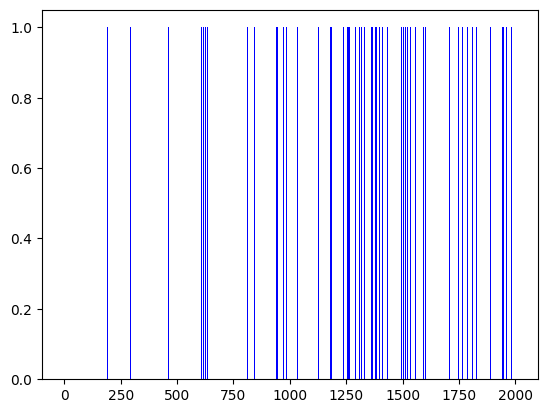

In [17]:
print('성공율: ', str(sum(rList)/num_episodes))
print('Q-table')
print(Q)
plt.bar(range(len(rList)), rList, color = 'blue')
plt.show()